In [1]:
import math
import random
import scipy
import statistics
import seaborn as sns
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data1 = pd.read_csv('drive/My Drive/RaceCarData.csv', sep=',', na_values=".")
data1

,a,b,c,d,Rep,Unnamed: 5
0,-1,-1,-1,-1,102,NaN
1,1,-1,-1,-1,106,NaN
2,-1,1,-1,-1,105,NaN
3,1,1,-1,-1,109,NaN
4,-1,-1,1,-1,76,NaN
5,1,-1,1,-1,102,NaN
6,-1,1,1,-1,127,NaN
7,1,1,1,-1,104,NaN
8,-1,-1,-1,1,199,NaN
9,1,-1,-1,1,133,NaN


In [7]:
data = data1.drop(['Unnamed: 5'], axis=1)
data

,a,b,c,d,Rep
0,-1,-1,-1,-1,102
1,1,-1,-1,-1,106
2,-1,1,-1,-1,105
3,1,1,-1,-1,109
4,-1,-1,1,-1,76
5,1,-1,1,-1,102
6,-1,1,1,-1,127
7,1,1,1,-1,104
8,-1,-1,-1,1,199
9,1,-1,-1,1,133


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       48 non-null     int64
 1   b       48 non-null     int64
 2   c       48 non-null     int64
 3   d       48 non-null     int64
 4   Rep     48 non-null     int64
dtypes: int64(5)
memory usage: 2.0 KB


In [9]:
aa=data[['a']].to_numpy()
bb=data[['b']].to_numpy()
cc=data[['c']].to_numpy()
dd=data[['d']].to_numpy()
ab=aa*bb
bc=bb*cc
ac=aa*cc
ad=aa*dd
bd=bb*dd
cd=cc*dd
abc=aa*bb*cc
abd=aa*bb*dd
bcd=bb*cc*dd
acd=aa*cc*dd
abcd=aa*bb*cc*dd

In [10]:
data['ab']=ab
data['bc']=bc
data['ac']=ac
data['ad']=ad
data['bd']=bd
data['cd']=cd
data['abc']=abc
data['abd']=abd
data['acd']=acd
data['bcd']=bcd
data['abcd']=abcd
X=data[['a', 'b', 'c', 'd', 'ab', 'bc', 'ac', 'ad', 'bd', 'cd', 'abc', 'abd', 'bcd', 'acd', 'abcd']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d,ab,bc,ac,ad,bd,cd,abc,abd,bcd,acd,abcd
0,1.0,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1
1,1.0,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1,1,-1
2,1.0,-1,1,-1,-1,-1,-1,1,1,-1,1,1,1,1,-1,-1
3,1.0,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1
4,1.0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,-1,1,1,-1
5,1.0,1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1
6,1.0,-1,1,1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1
7,1.0,1,1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1


In [11]:
Y=data[['Rep']]
Y

,Rep
0,102
1,106
2,105
3,109
4,76
5,102
6,127
7,104
8,199
9,133


In [12]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rep   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     62.96
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.98e-19
Time:                        15:29:40   Log-Likelihood:                -163.03
No. Observations:                  48   AIC:                             358.1
Df Residuals:                      32   BIC:                             388.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.3958      1.277    108.364      0.0

In [13]:
model = ols('Rep ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(b):C(c) + C(a):C(c) + C(a):C(d) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(d)+ C(a):C(c):C(d) + C(b):C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c):C(d)', data).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,36300.000000,1.0,463.650878,1.315750e-20
C(a),8.166667,1.0,0.104311,7.488176e-01
C(b),6.000000,1.0,0.076637,7.836887e-01
C(c),322.666667,1.0,4.121341,5.072737e-02
C(d),14210.666667,1.0,181.509313,9.788966e-15
C(a):C(b),85.333333,1.0,1.089941,3.043072e-01
C(b):C(c),408.333333,1.0,5.215540,2.916666e-02
C(a):C(c),225.333333,1.0,2.878127,9.949897e-02
C(a):C(d),2670.083333,1.0,34.104311,1.726286e-06
C(b):C(d),6912.000000,1.0,88.285258,1.017692e-10


In [14]:
eij=model.resid
eij

0     -8.000000
1     -1.666667
2     -3.000000
3     -7.333333
4    -19.333333
5     -8.333333
6     10.333333
7    -13.333333
8     -8.333333
9    -12.333333
10    -5.333333
11     5.333333
12     2.666667
13     0.666667
14    12.333333
15     2.333333
16     2.000000
17    -2.666667
18     1.000000
19     1.666667
20    16.666667
21     6.666667
22    -9.666667
23     6.666667
24    -2.333333
25     1.666667
26     6.666667
27     5.333333
28     3.666667
29    -1.333333
30    -6.666667
31    -4.666667
32     6.000000
33     4.333333
34     2.000000
35     5.666667
36     2.666667
37     1.666667
38    -0.666667
39     6.666667
40    10.666667
41    10.666667
42    -1.333333
43   -10.666667
44    -6.333333
45     0.666667
46    -5.666667
47     2.333333
dtype: float64

In [15]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) 
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[6, 10, 14, 39, 0, 43, 33, 30, 42, 16, 45, 18, 32, 21, 25, 38, 13, 47, 1, 41, 46, 34, 28, 37, 11, 40, 23, 8, 29, 15, 4, 9, 7, 24, 19, 17, 31, 3, 2, 35, 5, 20, 27, 12, 36, 26, 44, 22]


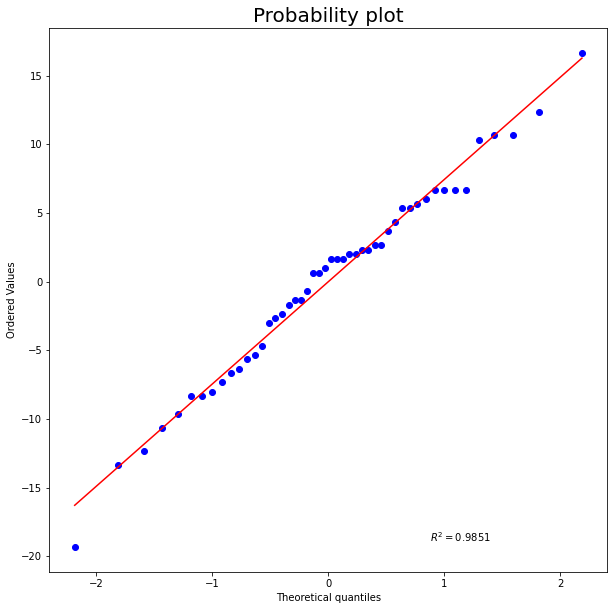

In [16]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot", fontsize= 20)
ax.set

plt.show()

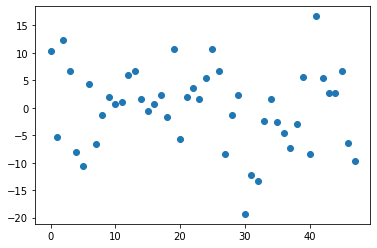

In [17]:
eij=model.resid

x = c 
y = eij[order] 

plt.scatter(x, y)